In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import keras
keras.__version__
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.neighbors import KNeighborsRegressor as knn
from keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from matplotlib import pyplot as plt
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [2]:
data=pd.read_csv("C:\\Users\\jqotw\\Downloads\\playground-series-s4e5\\train.csv")

In [3]:
data_10000=data.sample(10000)

In [4]:
X=data_10000.drop(['id','FloodProbability'],axis=1)
y=data_10000['FloodProbability']

In [35]:
grade=0
scores=[]
index=0
for i in range(100):

    model1=knn(n_neighbors=i+1)
    fold =KFold(5)
    score=cross_val_score(model1,X,y,cv=fold,scoring='r2')
    if np.mean(score) > grade:
        grade=np.mean(score)
        scores=score
        index= i+1
print(scores,grade, index)

KeyboardInterrupt: 

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8)

from sklearn.metrics import r2_score
model2=Sequential()
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(16,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy')

In [85]:
model2.fit(X_train,y_train,epochs=58)

Epoch 1/58
250/250 [==============================] - 1s 978us/step - loss: 0.7400
Epoch 2/58
250/250 [==============================] - 0s 979us/step - loss: 0.6938
Epoch 3/58
250/250 [==============================] - 0s 972us/step - loss: 0.6919
Epoch 4/58
250/250 [==============================] - 0s 978us/step - loss: 0.6909
Epoch 5/58
250/250 [==============================] - 0s 973us/step - loss: 0.6904
Epoch 6/58
250/250 [==============================] - 0s 965us/step - loss: 0.6900
Epoch 7/58
250/250 [==============================] - 0s 982us/step - loss: 0.6898
Epoch 8/58
250/250 [==============================] - 0s 988us/step - loss: 0.6896
Epoch 9/58
250/250 [==============================] - 0s 972us/step - loss: 0.6894
Epoch 10/58
250/250 [==============================] - 0s 959us/step - loss: 0.6893
Epoch 11/58
250/250 [==============================] - 0s 973us/step - loss: 0.6892
Epoch 12/58
250/250 [==============================] - 0s 985us/step - loss: 0.6891
E

In [86]:
model2.evaluate(X_test,y_test)

63/63 [==============================] - 0s 838us/step - loss: 0.6888


0.6887937784194946

In [87]:
print(r2_score(y_test,model2.predict(X_test)))

63/63 [==============================] - 0s 898us/step
0.8237924623837108


In [61]:
import keras_tuner

In [ ]:
def build_model(hp):
    model=Sequential()
    

In [62]:
mlp=MLPRegressor(activation='relu',batch_size=32)
MLP_params={'hidden_layer_sizes':[(8,2),(16,2),(24,2),(32,2),(40,2),(48,2),(56,2),(64,2),(8,4),(16,4),(24,4),(32,4),(40,4),(48,4),(56,4),(64,4),(8,8),(16,8),(24,8),(32,8),(40,8),(48,8),(56,8),(64,8),(16,16),(24,16),(32,16),(40,16),(48,16),(56,16),(64,16)],'max_iter':list(range(60,100,5))}
model3=GridSearchCV(mlp,param_grid=MLP_params,scoring='r2')
model3.fit(X,y)
print(model3.best_params_)

{'hidden_layer_sizes': (32, 16), 'max_iter': 65}


In [67]:
model4=MLPRegressor(hidden_layer_sizes=(32,16),max_iter=65,activation="relu",batch_size=32)
fold =KFold(5)
score=cross_val_score(model4,X,y,cv=fold,scoring='r2')
print(score,np.mean(score))


[0.82003937 0.81630254 0.74489954 0.81785059 0.80342456] 0.8005033220211082


In [5]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [73]:
mlp=MLPRegressor(activation='relu',batch_size=32,hidden_layer_sizes=(32,16))
MLP_params={'max_iter':list(range(40,70,1))}
model5=GridSearchCV(mlp,param_grid=MLP_params,scoring='r2')
model5.fit(X,y)
print(model5.best_params_)

{'max_iter': 58}


In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8)

from sklearn.metrics import r2_score
model6=Sequential()
model6.add(Dense(32))
model6.add(Activation(LeakyReLU()))
model6.add(BatchNormalization())
model6.add(Dense(16))
model6.add(Activation(LeakyReLU()))
model6.add(Dense(1,activation='sigmoid'))
model6.compile(optimizer='adam',loss='binary_crossentropy')

In [82]:
model6.fit(X_train,y_train,epochs=58)
print(r2_score(y_test,model6.predict(X_test)))

Epoch 1/58
250/250 [==============================] - 1s 1ms/step - loss: 0.7130
Epoch 2/58
250/250 [==============================] - 0s 977us/step - loss: 0.6928
Epoch 3/58
250/250 [==============================] - 0s 979us/step - loss: 0.6910
Epoch 4/58
250/250 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 5/58
250/250 [==============================] - 0s 1ms/step - loss: 0.6899
Epoch 6/58
250/250 [==============================] - 0s 984us/step - loss: 0.6896
Epoch 7/58
250/250 [==============================] - 0s 980us/step - loss: 0.6895
Epoch 8/58
250/250 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 9/58
250/250 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 10/58
250/250 [==============================] - 0s 976us/step - loss: 0.6892
Epoch 11/58
250/250 [==============================] - 0s 976us/step - loss: 0.6891
Epoch 12/58
250/250 [==============================] - 0s 983us/step - loss: 0.6891
Epoch 13/58

In [6]:
X2=data.drop(['id','FloodProbability'],axis=1)
y2=data['FloodProbability']
scaler=StandardScaler()
X2=scaler.fit_transform(X2)

In [90]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,train_size=.8)

from sklearn.metrics import r2_score
model6=Sequential()
model6.add(Dense(32))
model6.add(Activation(LeakyReLU()))
model6.add(BatchNormalization())
model6.add(Dense(16))
model6.add(Activation(LeakyReLU()))
model6.add(Dense(1,activation='sigmoid'))
model6.compile(optimizer='adam',loss='binary_crossentropy')

In [91]:
model6.fit(X_train2,y_train2,epochs=58)
print(r2_score(y_test2,model6.predict(X_test2)))

Epoch 1/58
27949/27949 [==============================] - 35s 1ms/step - loss: 0.6892
Epoch 2/58
27949/27949 [==============================] - 34s 1ms/step - loss: 0.6888
Epoch 3/58
27949/27949 [==============================] - 34s 1ms/step - loss: 0.6888
Epoch 4/58
27949/27949 [==============================] - 34s 1ms/step - loss: 0.6888
Epoch 5/58
27949/27949 [==============================] - 33s 1ms/step - loss: 0.6888
Epoch 6/58
27949/27949 [==============================] - 40s 1ms/step - loss: 0.6887
Epoch 7/58
27949/27949 [==============================] - 32s 1ms/step - loss: 0.6887
Epoch 8/58
27949/27949 [==============================] - 31s 1ms/step - loss: 0.6887
Epoch 9/58
27949/27949 [==============================] - 30s 1ms/step - loss: 0.6887
Epoch 10/58
27949/27949 [==============================] - 34s 1ms/step - loss: 0.6887
Epoch 11/58
27949/27949 [==============================] - 32s 1ms/step - loss: 0.6887
Epoch 12/58
27949/27949 [===========================

In [92]:
from sklearn.metrics import r2_score
model7=Sequential()
model7.add(Dense(32))
model7.add(Activation(LeakyReLU()))
model7.add(BatchNormalization())
model7.add(Dense(16))
model7.add(Activation(LeakyReLU()))
model7.add(BatchNormalization())
model7.add(Dense(1,activation='sigmoid'))
model7.compile(optimizer='adam',loss='binary_crossentropy')

In [103]:
model7.fit(X_train2,y_train2,epochs=58)
print(r2_score(y_test2,model7.predict(X_test2)))

Epoch 1/58
27949/27949 [==============================] - 39s 1ms/step - loss: 0.6888
Epoch 2/58
27949/27949 [==============================] - 40s 1ms/step - loss: 0.6888
Epoch 3/58
27949/27949 [==============================] - 39s 1ms/step - loss: 0.6888
Epoch 4/58
27949/27949 [==============================] - 39s 1ms/step - loss: 0.6888
Epoch 5/58
27949/27949 [==============================] - 43s 2ms/step - loss: 0.6888
Epoch 6/58
27949/27949 [==============================] - 40s 1ms/step - loss: 0.6888
Epoch 7/58
27949/27949 [==============================] - 40s 1ms/step - loss: 0.6888
Epoch 8/58
27949/27949 [==============================] - 37s 1ms/step - loss: 0.6888
Epoch 9/58
27949/27949 [==============================] - 39s 1ms/step - loss: 0.6888
Epoch 10/58
27949/27949 [==============================] - 37s 1ms/step - loss: 0.6888
Epoch 11/58
27949/27949 [==============================] - 35s 1ms/step - loss: 0.6888
Epoch 12/58
27949/27949 [===========================

In [94]:
model7.fit(X2,y2,epochs=58)

Epoch 1/58
34937/34937 [==============================] - 47s 1ms/step - loss: 0.6888
Epoch 2/58
34937/34937 [==============================] - 46s 1ms/step - loss: 0.6888
Epoch 3/58
34937/34937 [==============================] - 46s 1ms/step - loss: 0.6888
Epoch 4/58
34937/34937 [==============================] - 47s 1ms/step - loss: 0.6888
Epoch 5/58
34937/34937 [==============================] - 49s 1ms/step - loss: 0.6888
Epoch 6/58
34937/34937 [==============================] - 48s 1ms/step - loss: 0.6888
Epoch 7/58
34937/34937 [==============================] - 48s 1ms/step - loss: 0.6888
Epoch 8/58
34937/34937 [==============================] - 46s 1ms/step - loss: 0.6888
Epoch 9/58
34937/34937 [==============================] - 46s 1ms/step - loss: 0.6888
Epoch 10/58
34937/34937 [==============================] - 43s 1ms/step - loss: 0.6888
Epoch 11/58
34937/34937 [==============================] - 42s 1ms/step - loss: 0.6888
Epoch 12/58
34937/34937 [===========================

In [7]:
test=pd.read_csv("C:\\Users\\jqotw\\Downloads\\playground-series-s4e5\\test.csv")

In [8]:
XX=test.drop(['id'],axis=1)
XX=scaler.fit_transform(XX)
index=test['id']

In [97]:
predictions=model7.predict(XX)
print(predictions[0:5])

23291/23291 [==============================] - 22s 939us/step
[[0.5733142 ]
 [0.45752773]
 [0.45752123]
 [0.4713548 ]
 [0.47229823]]


In [98]:
predictions=pd.DataFrame(predictions)
predictions.head()

,0
0,0.573314
1,0.457528
2,0.457521
3,0.471355
4,0.472298


In [100]:
predictions.rename(columns = {0:'FloodProbability'}, inplace = True)
predictions.head()

,FloodProbability
0,0.573314
1,0.457528
2,0.457521
3,0.471355
4,0.472298


In [101]:
scores=pd.concat([index,predictions],axis=1)
scores.head()

,id,FloodProbability
0,1117957,0.573314
1,1117958,0.457528
2,1117959,0.457521
3,1117960,0.471355
4,1117961,0.472298


In [102]:
scores.to_csv("C:\\Users\\jqotw\\Downloads\\playground-series-s4e5\\submission5_7.csv",index=False)

6988/6988 [==============================] - 5s 720us/step


<function matplotlib.pyplot.show(close=None, block=None)>

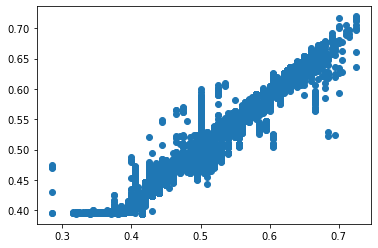

In [105]:
plt.scatter(y_test2,model7.predict(X_test2))
plt.show

In [108]:
forest=rf()
params={'n_estimators':list(range(50,500,50)),"max_depth":list(range(10,100,10))}
model8=GridSearchCV(forest,param_grid=params)
model8.fit(X,y)
print(model8.best_params_)

{'max_depth': 60, 'n_estimators': 450}


In [109]:



model6=Sequential()
model6.add(Dense(32))
model6.add(Activation(LeakyReLU()))
model6.add(BatchNormalization())
model6.add(Dense(16))
model6.add(Activation(LeakyReLU()))
model6.add(Dense(1,activation='sigmoid'))
model6.compile(optimizer='adam',loss='binary_crossentropy')
model6.fit(X2,y2,epochs=58)

Epoch 1/58
34937/34937 [==============================] - 42s 1ms/step - loss: 0.6890
Epoch 2/58
34937/34937 [==============================] - 41s 1ms/step - loss: 0.6887
Epoch 3/58
34937/34937 [==============================] - 40s 1ms/step - loss: 0.6887
Epoch 4/58
34937/34937 [==============================] - 42s 1ms/step - loss: 0.6887
Epoch 5/58
34937/34937 [==============================] - 41s 1ms/step - loss: 0.6887
Epoch 6/58
34937/34937 [==============================] - 43s 1ms/step - loss: 0.6887
Epoch 7/58
34937/34937 [==============================] - 41s 1ms/step - loss: 0.6887
Epoch 8/58
34937/34937 [==============================] - 40s 1ms/step - loss: 0.6887
Epoch 9/58
34937/34937 [==============================] - 39s 1ms/step - loss: 0.6887
Epoch 10/58
34937/34937 [==============================] - 38s 1ms/step - loss: 0.6887
Epoch 11/58
34937/34937 [==============================] - 47s 1ms/step - loss: 0.6887
Epoch 12/58
34937/34937 [===========================

In [110]:
predictions=model6.predict(XX)
print(predictions[0:5])

23291/23291 [==============================] - 20s 826us/step
[[0.5792425 ]
 [0.45460021]
 [0.45376024]
 [0.46968165]
 [0.47101822]]


In [111]:
predictions=pd.DataFrame(predictions)
predictions.rename(columns = {0:'FloodProbability'}, inplace = True)
scores=pd.concat([index,predictions],axis=1)
scores.head()

,id,FloodProbability
0,1117957,0.579243
1,1117958,0.454600
2,1117959,0.453760
3,1117960,0.469682
4,1117961,0.471018


In [112]:
scores.to_csv("C:\\Users\\jqotw\\Downloads\\playground-series-s4e5\\submission5_9.csv",index=False)

In [ ]:
model8=rf(max_depth=60,n_estimators=450)
model8.fit(X2,y2)

In [113]:
score1=pd.read_csv("C:\\Users\\jqotw\\Downloads\\playground-series-s4e5\\submission5_7.csv")
score2=pd.read_csv("C:\\Users\\jqotw\Downloads\\submission_5.3.csv")

In [114]:
score3=pd.DataFrame(score1['id'])

In [115]:
score3['FloodProbability']=(score1['FloodProbability']+score2['FloodProbability'])/2
score3.head()

,id,FloodProbability
0,1117957,0.573229
1,1117958,0.456550
2,1117959,0.456297
3,1117960,0.468908
4,1117961,0.469315


In [116]:
score3.to_csv("C:\\Users\\jqotw\\Downloads\\playground-series-s4e5\\submission5_9_2.csv",index=False)

In [118]:
model8.fit(X2,y2)

MemoryError: could not allocate 117440512 bytes